In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def first_integrate(dt, acce, mean):
    """
    Returns a velocity by integrating the acceleration
    """
    v = [0]
    for i in range(1, acce.shape[0]):
        
        a = v[i-1] + (acce[i-1] + acce[i] - 2*mean)*(dt[i]-dt[i-1])*(1/2)
        v.append(a)
    
    return np.array(v)

In [3]:
def second_integrate(dt, vel):
    """
    Returns position by integrating the velocity
    """
    p = [0,0]
    
    for i in range(2, vel.shape[0]):
        
        a = p[i-1] + (vel[i-1]+vel[i])*(dt[i]-dt[i-1])*(1/2)
        p.append(a)
    
    return np.array(p)

In [12]:
data = pd.read_csv('log7.csv', header=None)
data.columns = 'timestamp acce ax ay az gyro gx gy gz mag mx my mz dt'.split(' ')

acc = 'ax ay az'.split(' ')
vel = 'vx vy vz'.split(' ')
pos = 'px py pz'.split(' ')
dt = np.array(data.timestamp)


calibrate = pd.read_csv('static.csv')
calibrate.columns = 'timestamp acce ax ay az gyro gx gy gz mag mx my mz dt'.split(' ')
error_mean = {
    'ax': float(calibrate.ax.std()),
    'ay': float(calibrate.ay.std()),
    'az': float(calibrate.az.std())
}

In [13]:
for i in range(0,3):
    
    data[vel[i]] = first_integrate(dt, np.array(data[acc[i]]), error_mean[acc[i]])
    data[pos[i]] = second_integrate(dt, np.array(data[vel[i]]))

In [14]:
data.head()

,timestamp,acce,ax,ay,az,gyro,gx,gy,gz,mag,mx,my,mz,dt,vx,px,vy,py,vz,pz
0,682533.15002,3,-0.092,0.032,9.652,4,0.007,0.024,-0.005,5,-8.25,-16.46,15.18,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,682533.16002,3,-0.065,0.017,9.795,4,0.007,-0.001,-0.003,5,-8.50,-16.80,15.10,0.01000,-0.001003,0.000000,0.000188,0.000000,0.096795,0.000000
2,682533.17007,3,-0.083,0.018,9.728,4,0.009,0.010,-0.002,5,-8.50,-16.80,15.10,0.01005,-0.001967,-0.000015,0.000306,0.000002,0.194456,0.001464
3,682533.18001,3,-0.072,0.018,9.759,4,0.008,0.010,-0.003,5,-8.20,-16.60,14.00,0.00994,-0.002954,-0.000039,0.000428,0.000006,0.290869,0.003876
4,682533.19002,3,-0.069,0.026,9.755,4,0.006,0.005,0.001,5,-8.20,-16.60,14.00,0.01001,-0.003878,-0.000074,0.000590,0.000011,0.388096,0.007274


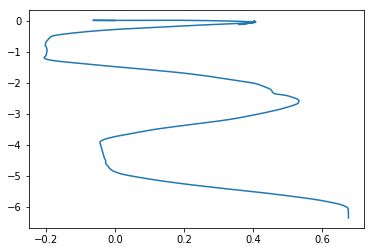

In [15]:
fig = plt.figure()
#ax = Axes3D(fig)
plt.plot(data.px, data.py)

In [16]:
data['ax', 'ay'].to_csv()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 20 columns):
timestamp    1209 non-null float64
acce         1209 non-null int64
ax           1209 non-null float64
ay           1209 non-null float64
az           1209 non-null float64
gyro         1209 non-null int64
gx           1209 non-null float64
gy           1209 non-null float64
gz           1209 non-null float64
mag          1209 non-null int64
mx           1209 non-null float64
my           1209 non-null float64
mz           1209 non-null float64
dt           1209 non-null float64
vx           1209 non-null float64
px           1209 non-null float64
vy           1209 non-null float64
py           1209 non-null float64
vz           1209 non-null float64
pz           1209 non-null float64
dtypes: float64(17), int64(3)
memory usage: 189.0 KB
